In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, GRU, LSTM, Conv3D, ConvLSTM2D, BatchNormalization

## dataset

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [3]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(x_train[:5])
print(y_train[:5])

(25000,)
(25000,)
(25000,)
(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178

In [5]:
print("number of labels: {}".format(max(y_train) + 1))

number of labels: 2


## preprocess

In [6]:
MAX_FEATURES = 10000

tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_sequences(x_train)
x_train = tokenizer.sequences_to_matrix(x_train, mode='tfidf')
y_train = tf.keras.utils.to_categorical(y_train)

print(type(x_train))
print(x_train.shape)
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(25000, 10000)
<class 'numpy.ndarray'>
(25000, 2)


In [7]:
print(x_train[:5, :10])

[[0.         0.69312718 0.         0.         2.58559673 2.27091407
  1.49015391 1.21842198 1.52168322 0.74890259]
 [0.         0.69312718 0.         0.         2.58559673 2.34574918
  1.49015391 1.21842198 1.52168322 2.47331454]
 [0.         0.69312718 0.         0.         2.2294017  0.
  1.69442726 1.71722432 1.73027867 1.26800231]
 [0.         0.69312718 0.         0.         3.19605478 2.47524794
  2.18660773 2.91051783 2.52687169 2.60985563]
 [0.         0.69312718 0.         0.         1.18061935 1.98292166
  1.20224679 1.71722432 1.22768444 0.        ]]


In [8]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=5)

In [9]:
print(x_tr.shape)
print(x_val.shape)
print(y_tr.shape)

(18750, 10000)
(6250, 10000)
(18750, 2)


# [Problem 1] Execution of various methods

In [10]:
MAX_FEATURES = 10000
BATCH_SIZE = 250
EPOCHS = 5

## SimpleRNN

In [16]:
model = Sequential()

model.add(Embedding(MAX_FEATURES, 128))
model.add(SimpleRNN(4, activation="relu"))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_tr, y_tr,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/5
75/75 [==============================] - 1142s 15s/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 2/5
75/75 [==============================] - 1183s 16s/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.4950
Epoch 3/5
75/75 [==============================] - 1201s 16s/step - loss: 0.6931 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.4950
Epoch 4/5
75/75 [==============================] - 1203s 16s/step - loss: 0.6930 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.4950
Epoch 5/5
75/75 [==============================] - 1196s 16s/step - loss: 0.6930 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.4950


## GRU

In [19]:
model = Sequential()

model.add(Embedding(MAX_FEATURES, 128))
model.add(GRU(4, activation="relu"))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_tr, y_tr,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/5
75/75 [==============================] - 1361s 18s/step - loss: 0.6931 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 2/5
75/75 [==============================] - 1395s 19s/step - loss: 0.6930 - accuracy: 0.4991 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 3/5
75/75 [==============================] - 1401s 19s/step - loss: 0.6930 - accuracy: 0.4959 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 4/5
75/75 [==============================] - 1397s 19s/step - loss: 0.6930 - accuracy: 0.5017 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 5/5
75/75 [==============================] - 1377s 18s/step - loss: 0.6930 - accuracy: 0.4911 - val_loss: 0.6933 - val_accuracy: 0.4950


## LSTM

In [20]:
model = Sequential()

model.add(Embedding(MAX_FEATURES, 128))
model.add(LSTM(4, activation="relu"))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_tr, y_tr,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/5
75/75 [==============================] - 1442s 19s/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 2/5
75/75 [==============================] - 1235s 16s/step - loss: 0.6931 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 3/5
75/75 [==============================] - 1238s 17s/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 4/5
75/75 [==============================] - 1233s 16s/step - loss: 0.6931 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 5/5
75/75 [==============================] - 1233s 16s/step - loss: 0.6931 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.4950


## ConvLSTM2D

In [12]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:500], shifted_movies[:500], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]

Epoch 1/2
48/48 [==============================] - 1036s 21s/step - loss: 0.7557 - val_loss: 0.6993
Epoch 2/2
48/48 [==============================] - 1026s 21s/step - loss: 0.7365 - val_loss: 0.7067


NameError: ignored

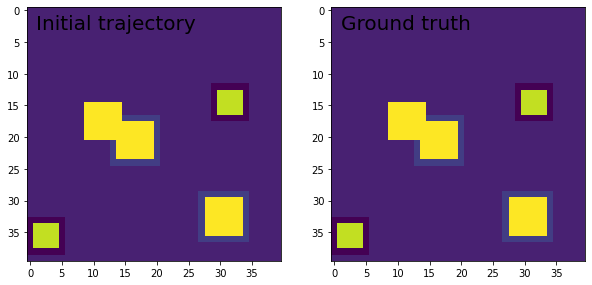

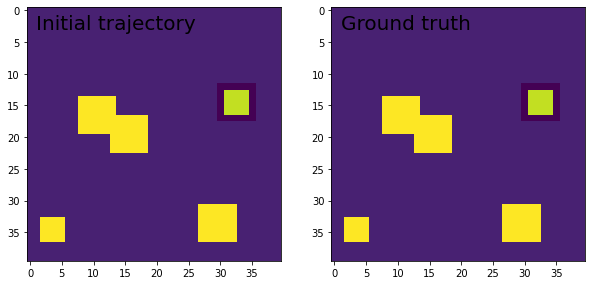

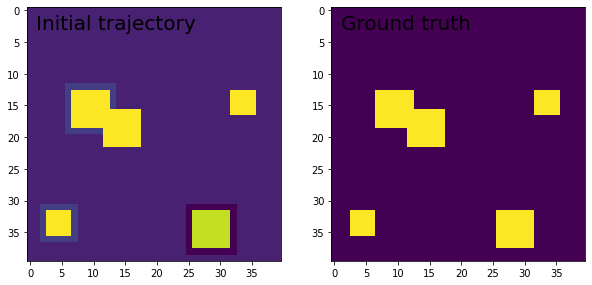

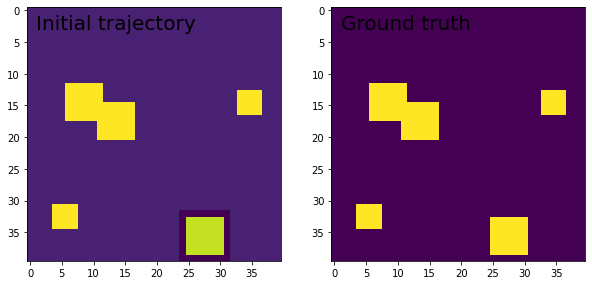

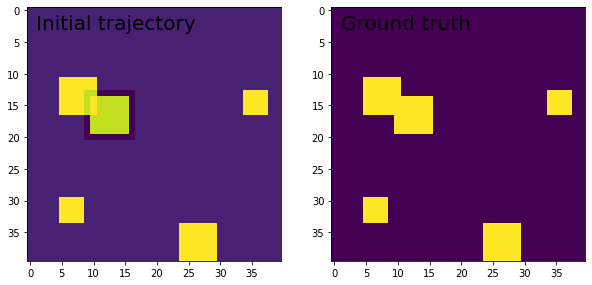

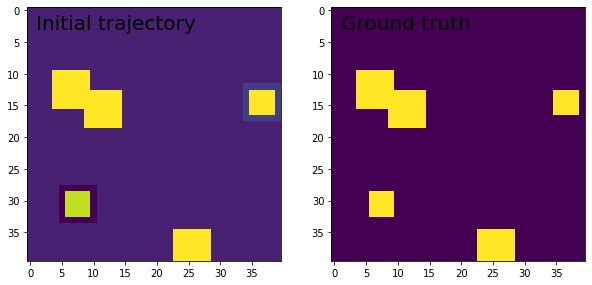

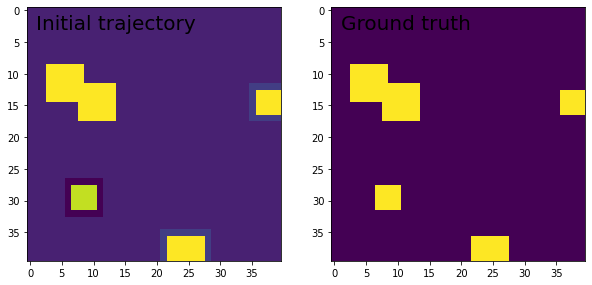

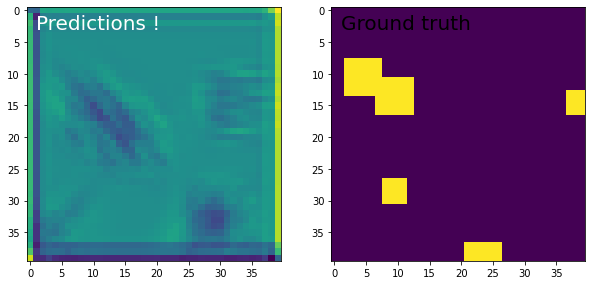

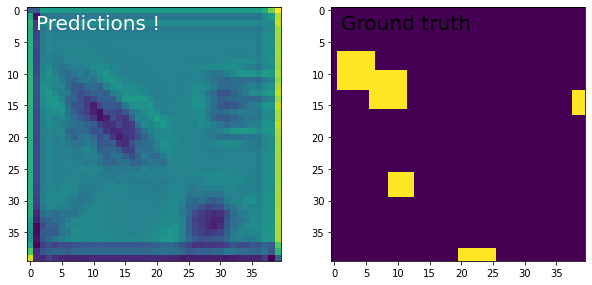

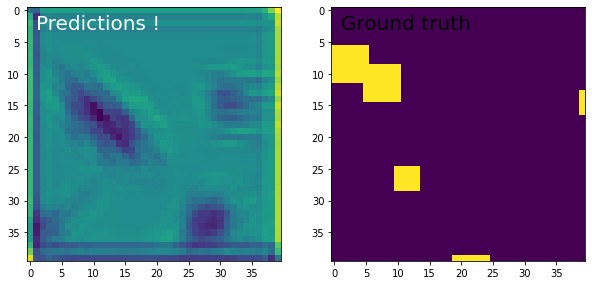

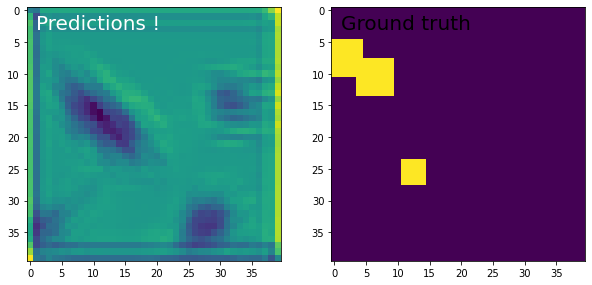

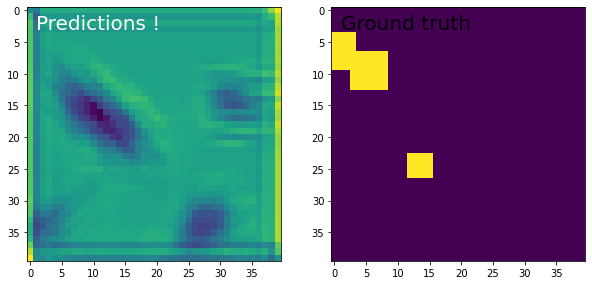

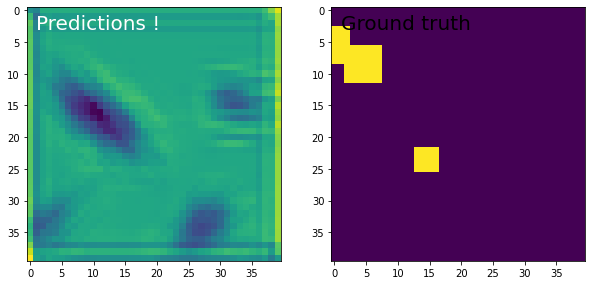

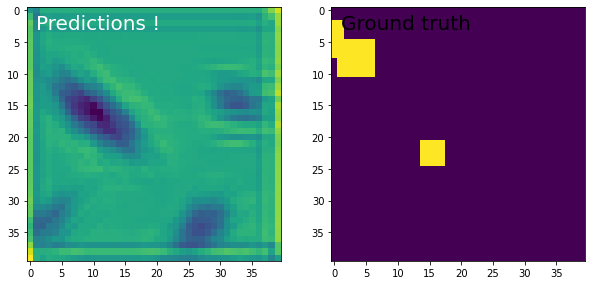

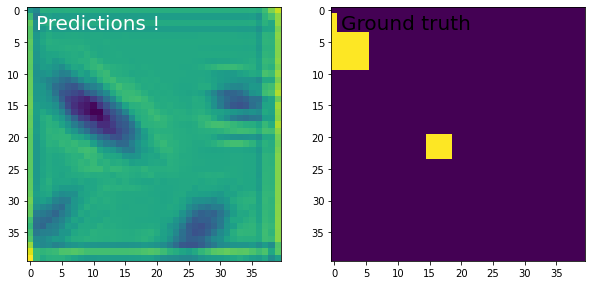

In [13]:
import matplotlib.pyplot as plt

for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# [Problem 3] Explanation of other classes

- ```RNN``` Base class for recurrent layers.
- ```SimpleRNNCell``` This class processes one step within the whole time sequence input, whereas tf.keras.layer.SimpleRNN processes the whole sequence.
- ```GRUCell``` Cell class for the GRU layer.
- ```LSTMCell``` Cell class for the LSTM layer.
- ```StackedRNNCells``` Wrapper allowing a stack of RNN cells to behave as a single cell.
- ```CuDNNGRU``` Fast GRU implementation backed by cuDNN.
- ```CuDNNLSTM``` Fast LSTM implementation backed by cuDNN.